<a href="https://www.kaggle.com/code/ilhamrizalulfath/clustering-kemiskinan?scriptVersionId=254483893" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# LANGKAH 1: IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

print("Library berhasil diimpor")

Library berhasil diimpor




---



# LANGKAH 2: LOAD DATASET

In [2]:
file_path = '/kaggle/input/jumlah-penduduk-miskin-provinsi-2020-2024/Jumlah Penduduk Miskin Provinsi 2020-2025.xlsx'
df = pd.read_excel(file_path, skiprows=1)

# Langkah 3: DATA UNDERSTANDING

 ###   Melihat keseluruhan dataset

In [3]:
df

,Provinsi,2020,2021,2022,2023,2024
0,Aceh,814.91,834.24,806.82,806.75,804.53
1,Sumatera Utara,1283.29,1343.86,1268.19,1239.71,1228.01
2,Sumatera Barat,344.23,370.67,335.21,340.37,345.73
3,Riau,483.39,500.81,485.03,485.66,492.25
4,Jambi,277.8,293.86,279.37,280.68,265.42
5,Sumatera Selatan,1081.58,1113.76,1044.69,1045.68,984.24
6,Bengkulu,302.58,306,297.23,288.46,281.36
7,Lampung,1049.32,1083.93,1002.41,970.67,941.23
8,Kep. Bangka Belitung,68.39,72.71,66.78,68.69,69.95
9,Kepulauan Riau,131.97,144.46,151.68,142.5,138.3


Hasil output dari dataframe yang berisikan 
provinsi, tahun dan jumlah dari penduduk miskin per provinsi selama 5 tahun dan 
dibagian akhir terdapat jumlah dari keseluruhan. Pada hasil output dapat dilihat data 
masih belum baik karena masih memiliki nilai kosong (null) dan baris jumlah yang 
nantinya perlu dipisahkan pada proses Data Preparation.

###  Melihat tipe data dari masing masing kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provinsi  39 non-null     object
 1   2020      39 non-null     object
 2   2021      39 non-null     object
 3   2022      39 non-null     object
 4   2023      39 non-null     object
 5   2024      39 non-null     object
dtypes: object(6)
memory usage: 2.0+ KB


Hasil pemeriksaan menunjukkan bahwa dataframe terdiri dari 39 baris, yang dimulai dari 
indeks ke-0 hingga indeks ke-38. Proses ini juga menunjukkan bahwa tidak ada data 
kosong (Non-Null) dalam dataframe, meskipun beberapa baris yang kosong 
diwakili oleh nilai “-”, yang dibaca sebagai tipe data string. Hal ini menyebabkan 
kolom yang seharusnya berisi nilai numerik, seperti tahun 2020 hingga 2024, 
teridentifikasi dengan tipe data object/string. Oleh karena itu, penyesuaian tipe data 
pada kolom-kolom tersebut perlu dilakukan pada tahap preprocessing untuk 
memastikan bahwa dataframe siap digunakan dalam analisis lebih lanjut, seperti 
clustering, tanpa adanya gangguan dari tipe data yang salah.



---



# LANGKAH 4: PREPROCESSING

###  Cek Data Duplikat

In [5]:
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows)

print(f"\nJumlah total data duplikat: {num_duplicate_rows}")


Jumlah total data duplikat: 0


Hasil pengecekan data duplikat dalam DataFrame. Hasil pengecekan menunjukkan bahwa tidak terdapat data duplikat 
dalam DataFrame, sehingga tidak perlu dilakukan penghapusan baris duplikat. Dengan demikian, proses selanjutnya dapat dilanjutkan tanpa ada masalah terkait duplikasi data.

###  Cek Data kosong/null

In [6]:
num_dash_values = (df == '-').sum()
num_dash_values

Provinsi    0
2020        4
2021        4
2022        4
2023        4
2024        4
dtype: int64

Identifikasi nilai '-', yang digunakan untuk menandai data kosong atau missing values, dalam DataFrame. Hasil pemeriksaan 
menunjukkan bahwa setiap kolom tahunan berisi 4 data yang bernilai '-', sedangkan kolom 'Provinsi' tidak mengandung nilai kosong. 

###  Pemisahan Data

In [7]:
pd.set_option('future.no_silent_downcasting', True)

tahun_columns = [2020, 2021, 2022, 2023, 2024]
valid_data = df[(df['Provinsi'] != "Indonesia") & ~(df[tahun_columns] == "-").any(axis=1)]
invalid_data = df[(df[tahun_columns] == "-").any(axis=1) & (df['Provinsi'] != "Indonesia")]
jumlah_data = df[df['Provinsi'] == "Indonesia"]

print("\nDATA VALID:")
print(f"Jumlah data: {len(valid_data)}")
print(valid_data)

print("\nDATA INVALID:")
print(f"Jumlah data: {len(invalid_data)}")
print(invalid_data)

print("\nJumlah Keseluruhan:")
print(f"Jumlah data: {len(jumlah_data)}")
print(jumlah_data)


DATA VALID:
Jumlah data: 34
                Provinsi     2020     2021     2022     2023     2024
0                   Aceh   814.91   834.24   806.82   806.75   804.53
1         Sumatera Utara  1283.29  1343.86  1268.19  1239.71  1228.01
2         Sumatera Barat   344.23   370.67   335.21   340.37   345.73
3                   Riau   483.39   500.81   485.03   485.66   492.25
4                  Jambi    277.8   293.86   279.37   280.68   265.42
5       Sumatera Selatan  1081.58  1113.76  1044.69  1045.68   984.24
6               Bengkulu   302.58      306   297.23   288.46   281.36
7                Lampung  1049.32  1083.93  1002.41   970.67   941.23
8   Kep. Bangka Belitung    68.39    72.71    66.78    68.69    69.95
9         Kepulauan Riau   131.97   144.46   151.68    142.5    138.3
10           DKI Jakarta   480.86   501.92   502.04   477.83   464.93
11            Jawa Barat  3920.23  4195.34  4070.98   3888.6  3848.67
12           Jawa Tengah   3980.9  4109.75  3831.44   3791.5 

Proses pemisahan data bertujuan untuk membagi DataFrame menjadi beberapa subset yang lebih spesifik, sehingga memungkinkan untuk melakukan analisis lebih lanjut dengan fokus pada data yang dianggap valid dan relevan. Melalui implementasi kode tersebut, DataFrame diklasifikasikan ke dalam tiga kategori utama, yaitu: pertama, Data Valid, yang terdiri dari baris baris data untuk setiap provinsi di mana seluruh kolom tahunan tidak mengandung nilai “-“. Kedua, Data Invalid, yang mencakup baris-baris data provinsi yang memiliki nilai '-' pada kolom tahunannya, mengindikasikan adanya data yang tidak lengkap. Ketiga, Data Jumlah Keseluruhan, yang merupakan baris-baris data di mana kolom 'Provinsi' secara spesifik bernilai "Indonesia" dan nilai pada kolom tahun berisi jumlah keseluruhan dari masing-masing  tahun.

###  Perubahan Tipe Data

In [8]:
valid_data = valid_data.copy()

valid_data[tahun_columns] = valid_data[tahun_columns].astype(float)
print(valid_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 0 to 34
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  34 non-null     object 
 1   2020      34 non-null     float64
 2   2021      34 non-null     float64
 3   2022      34 non-null     float64
 4   2023      34 non-null     float64
 5   2024      34 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.9+ KB
None


Tahap ini dilakukan untuk mengkonversi tipe data pada kolom-kolom tahun, mengatasi ketidaksesuaian yang telah teridentifikasi pada tahap Data Understanding.

###  Mencari rata-rata untuk setiap kolom tahun

In [9]:
valid_data['Rata-rata'] = valid_data[[2020, 2021, 2022, 2023, 2024]].mean(axis=1)
valid_data = valid_data.drop(columns=[2020, 2021, 2022, 2023, 2024])
valid_data

,Provinsi,Rata-rata
0,Aceh,813.450
1,Sumatera Utara,1272.612
2,Sumatera Barat,347.242
3,Riau,489.428
4,Jambi,279.426
5,Sumatera Selatan,1053.990
6,Bengkulu,295.126
7,Lampung,1009.512
8,Kep. Bangka Belitung,69.304
9,Kepulauan Riau,141.782


Menghitung rata-rata jumlah penduduk miskin dari tahun 2020 hingga 2024 untuk setiap provinsi, dengan tujuan menghasilkan satu nilai representatif per provinsi, menyederhanakan dimensi data dan menjadikannya dasar untuk clustering.

###  Konversi Data Tahun ke Format Array

In [10]:
dataArray = valid_data[['Rata-rata']].values
print(dataArray)

[[ 813.45 ]
 [1272.612]
 [ 347.242]
 [ 489.428]
 [ 279.426]
 [1053.99 ]
 [ 295.126]
 [1009.512]
 [  69.304]
 [ 141.782]
 [ 485.516]
 [3984.764]
 [3883.584]
 [ 466.19 ]
 [4268.924]
 [ 814.996]
 [ 190.21 ]
 [ 730.546]
 [1144.674]
 [ 354.868]
 [ 141.176]
 [ 192.784]
 [ 232.138]
 [  49.982]
 [ 189.942]
 [ 393.388]
 [ 772.916]
 [ 314.31 ]
 [ 183.69 ]
 [ 160.252]
 [ 305.97 ]
 [  84.058]
 [ 194.314]
 [ 764.398]]


###  Normalisasi

In [11]:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(dataArray)
data_scaled_df = pd.DataFrame(scaled_data, columns=['Rata-rata'])
data_scaled_df

,Rata-rata
0,0.043410
1,0.471834
2,-0.391588
3,-0.258921
4,-0.454864
5,0.267847
6,-0.440215
7,0.226347
8,-0.650920
9,-0.583294


Pada tahap ini, dilakukan proses normalisasi data untuk menyetarakan skala 
antar nilai sehingga tidak ada atribut yang mendominasi proses perhitungan dalam algoritma K-Means. Data jumlah penduduk miskin antarprovinsi memiliki skala yang bervariasi tergantung pada jumlah penduduk di tiap wilayah. Oleh karena itu, jika tidak dinormalisasi, provinsi dengan jumlah penduduk yang besar akan memberikan kontribusi yang lebih besar terhadap proses pembentukan klaster, yang dapat mengakibatkan bias dalam hasil clustering. 

Teknik normalisasi yang digunakan dalam penelitian ini adalah StandardScaler, yang merupakan salah satu metode dari pustaka scikit-learn. Metode ini mengubah nilai asli setiap atribut menjadi nilai yang memiliki distribusi standar dengan rata-rata (mean) sebesar 0 dan simpangan baku (standard deviation) sebesar 1.



---



# LANGKAH 5: ELBOW METHOD

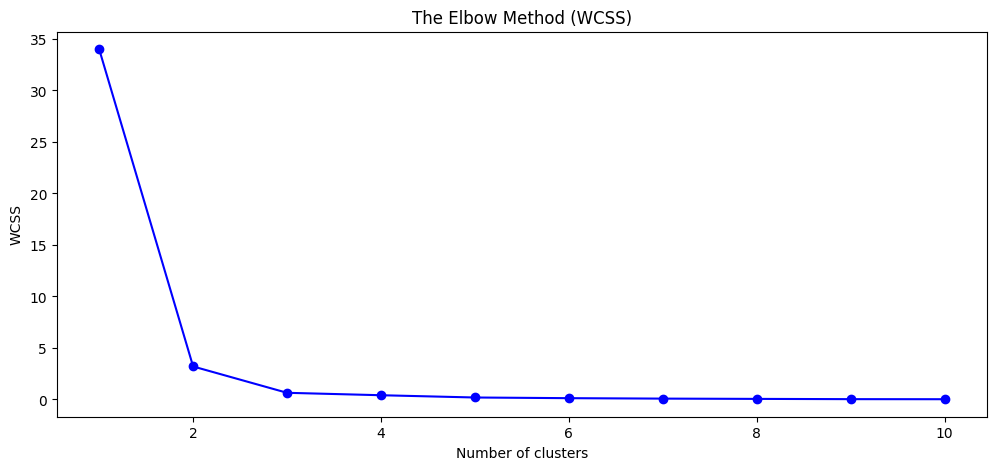

In [12]:
wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0, n_init=10, init='k-means++', max_iter=300)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

# Plot the WCSS results
plt.figure(figsize=(12,5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('The Elbow Method (WCSS)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Dari grafik terlihat bahwa terjadi penurunan WCSS yang sangat tajam dari 
klaster 1 ke klaster 2. Setelah itu, penurunan WCSS mulai melambat secara 
signifikan, membentuk pola siku atau “elbow” pada jumlah klaster 2. Titik inilah yang dianggap sebagai klaster optimal, karena setelah titik tersebut penambahan jumlah klaster tidak memberikan pengurangan WCSS yang signifikan.



---



# LANGKAH 6: MODELING

###  Mencari Titik Centroid

In [13]:
optimal_k = 2
def calculate_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) if np.any(labels == i) else np.zeros_like(data[0]) for i in range(k)])

def kmeans_iterations_sorted(data, k, max_iters=300, tol=1e-4):
    # Inisialisasi centroid acak
    np.random.seed(42)
    initial_indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[initial_indices]
    centroids = centroids[np.argsort(centroids.mean(axis=1))]

    print("Initial Centroids:")
    for j in range(k):
        print(f"Centroid {j}: {centroids[j]}")
    print("-" * 50)

    for i in range(max_iters):
        distances = np.array([np.linalg.norm(data - c, axis=1) for c in centroids])
        labels = np.argmin(distances, axis=0)

        new_centroids = calculate_centroids(data, labels, k)
        new_centroids_sorted = new_centroids[np.argsort(new_centroids.mean(axis=1))]

        print(f"Iteration {i+1} Centroids:")
        for j in range(k):
            print(f"Centroid {j}: {new_centroids[j]}")
        print("-" * 50)

        if np.linalg.norm(new_centroids - centroids) < tol:
            print(f"Converged after {i+1} iterations.")
            break

        centroids = new_centroids

    final_centroids_sorted = centroids[np.argsort(centroids.mean(axis=1))]
    return labels, final_centroids_sorted
labels, final_centroids = kmeans_iterations_sorted(scaled_data, optimal_k)

print("\nFinal Sorted Centroids:")
for j in range(optimal_k):
    print(f"Centroid {j}: {final_centroids[j]}")

Initial Centroids:
Centroid 0: [-0.38447249]
Centroid 1: [0.04485259]
--------------------------------------------------
Iteration 1 Centroids:
Centroid 0: [-0.479729]
Centroid 1: [0.87950317]
--------------------------------------------------
Iteration 2 Centroids:
Centroid 0: [-0.38875881]
Centroid 1: [1.49949827]
--------------------------------------------------
Iteration 3 Centroids:
Centroid 0: [-0.29606449]
Centroid 1: [3.05933309]
--------------------------------------------------
Iteration 4 Centroids:
Centroid 0: [-0.29606449]
Centroid 1: [3.05933309]
--------------------------------------------------
Converged after 4 iterations.

Final Sorted Centroids:
Centroid 0: [-0.29606449]
Centroid 1: [3.05933309]


Algoritma K-Means diimplementasikan dengan memanfaatkan hasil analisis dari Elbow Method yang telah menentukan jumlah klaster optimal, yaitu K=2. Proses implementasi dilakukan melalui tiga tahap utama, yaitu inisialisasi centroid, perhitungan jarak antar data dengan centroid, serta pembaruan posisi centroid. Tahap perhitungan jarak dan pembaruan centroid dilakukan secara iteratif hingga mencapai kondisi konvergensi, yaitu ketika tidak ada perubahan signifikan pada posisi centroid.

###  melihat jarak data ke masing masing centroid

In [14]:
distances = []
for i in range(len(scaled_data)):
    province_distances = [euclidean(scaled_data[i], centroid) for centroid in final_centroids]
    distances.append(province_distances)

distance_df = pd.DataFrame(distances, columns=[f'Centroid {j}' for j in range(optimal_k)])
distance_df['Provinsi'] = valid_data['Provinsi'].values
distance_df['Cluster'] = labels

distance_df = distance_df[['Provinsi', 'Centroid 0', 'Centroid 1', 'Cluster']]
distance_df

,Provinsi,Centroid 0,Centroid 1,Cluster
0,Aceh,0.339475,3.015923,0
1,Sumatera Utara,0.767898,2.587499,0
2,Sumatera Barat,0.095523,3.450921,0
3,Riau,0.037144,3.318254,0
4,Jambi,0.158800,3.514197,0
5,Sumatera Selatan,0.563912,2.791486,0
6,Bengkulu,0.144151,3.499548,0
7,Lampung,0.522411,2.832986,0
8,Kep. Bangka Belitung,0.354855,3.710253,0
9,Kepulauan Riau,0.287229,3.642627,0


Setelah algoritma K-Means selesai dijalankan, setiap provinsi akan dikelompokkan ke dalam klaster berdasarkan jarak terdekatnya dengan titik pusat (centroid) klaster. Proses ini akan menghasilkan dua klaster, yaitu Klaster 0 dan Klaster 1.

###  Jumlah anggota cluster

In [15]:
cluster_counts = distance_df['Cluster'].value_counts().sort_index()
cluster_counts

Cluster
0    31
1     3
Name: count, dtype: int64

Jumlah anggota dari masing-masing klaster hasil 
pengelompokan. Terdapat dua klaster yang terbentuk: Klaster 0 yang terdiri dari 31 
provinsi, dan Klaster 1 yang terdiri dari 3 provinsi.

###  Penambahan Klaster ke DataFrame

In [16]:
valid_data['Cluster'] = labels
valid_data

,Provinsi,Rata-rata,Cluster
0,Aceh,813.450,0
1,Sumatera Utara,1272.612,0
2,Sumatera Barat,347.242,0
3,Riau,489.428,0
4,Jambi,279.426,0
5,Sumatera Selatan,1053.990,0
6,Bengkulu,295.126,0
7,Lampung,1009.512,0
8,Kep. Bangka Belitung,69.304,0
9,Kepulauan Riau,141.782,0


Setelah proses clustering dengan algoritma K-Means selesai, langkah 
selanjutnya yaitu pembentukan ulang data. Pembentukan ulang data dilakukan 
dengan menambahkan kolom hasil clustering pada dataframe.

# LANGKAH 7: EVALUASI KLASTER

In [17]:
silhouette_avg = silhouette_score(scaled_data, valid_data['Cluster'])

print(f"\nSilhouette Score: {silhouette_avg}")


Silhouette Score: 0.8926810136375877


# LANGKAH 8: VISUALISASI

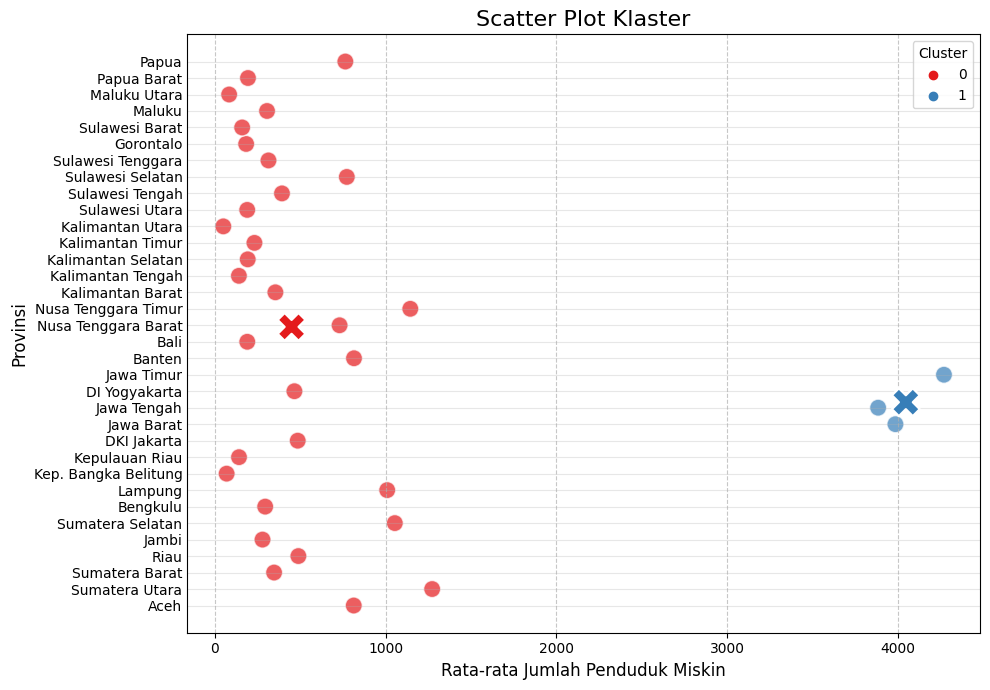

In [18]:
valid_data['Y_Index'] = range(len(valid_data))

palette = sns.color_palette('Set1', n_colors=len(valid_data['Cluster'].unique()))

x_vals = valid_data['Rata-rata']
y_vals_plot = valid_data['Y_Index']

plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_vals, y=y_vals_plot, hue=valid_data['Cluster'],
                palette=palette, s=150, alpha=0.7, legend='full')

centroid_data_for_plot = valid_data.copy()
centroid_data_for_plot['X_Centroid'] = centroid_data_for_plot['Rata-rata']
centroid_data_for_plot['Y_Centroid'] = centroid_data_for_plot['Y_Index']

centroids_plot = centroid_data_for_plot.groupby('Cluster')[['X_Centroid', 'Y_Centroid']].mean().reset_index()

sns.scatterplot(x=centroids_plot['X_Centroid'], y=centroids_plot['Y_Centroid'],
                hue=centroids_plot['Cluster'],
                palette=palette, marker='X', s=400, legend=False,
                zorder=5)

plt.yticks(valid_data['Y_Index'], valid_data['Provinsi'], fontsize=10)
plt.tick_params(axis='y', length=0)

plt.title('Scatter Plot Klaster', fontsize=16)
plt.xlabel('Rata-rata Jumlah Penduduk Miskin', fontsize=12)
plt.ylabel('Provinsi', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

valid_data = valid_data.drop(columns=['Y_Index'])

Scatter plot berfungsi untuk memperjelas distribusi provinsi ke dalam dua klaster yang terbentuk oleh algoritma K-Means.

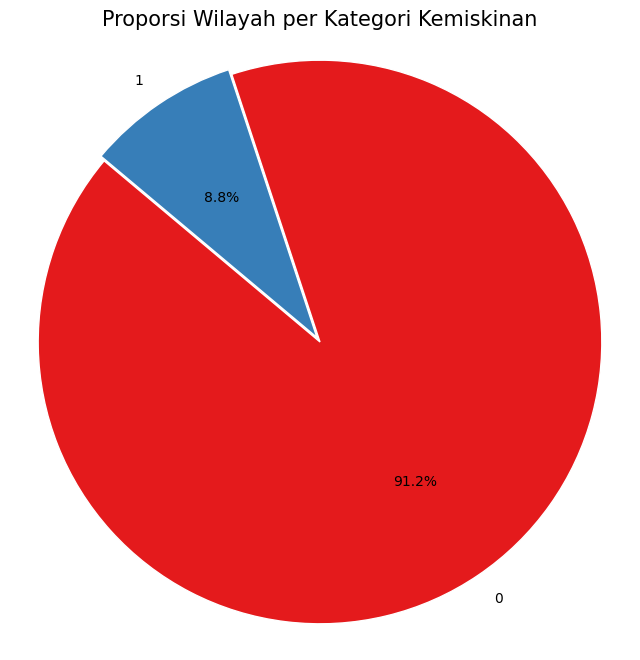

In [19]:
plt.figure(figsize=(8, 8))
cluster_counts = valid_data['Cluster'].value_counts()
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('Set1'), explode=[0.01] * len(cluster_counts), wedgeprops={'edgecolor': 'white'})

plt.title('Proporsi Wilayah per Kategori Kemiskinan', fontsize=15)
plt.axis('equal')
plt.show()

pie chart memperlihatkan proporsi persentase provinsi dalam masing-masing kategori klaster. Dari visualisasi tersebut, terlihat bahwa sekitar 91,2% provinsi masuk dalam Klaster 0, sedangkan 8,8% sisanya berada dalam Klaster 1.

In [20]:
# from google.colab import files

# # Make the result downloadable
# valid_data.to_excel('hasil_clustering_kemiskinan.xlsx', index=False)
# files.download('hasil_clustering_kemiskinan.xlsx')


Hilangkan komen diatas jika ingin melakukan download file. 